In [186]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud  import WordCloud
import pickle

In [188]:
data = pd.read_csv('./googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [189]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Removing Entries With Missing Entries for Accuracy

In [190]:
data = data.dropna()

In [191]:
data.sort_values(by='Size', ascending=False)[(data.Size != 'Varies with device') & (data.Size != '99M')]

C:\Users\user\AppData\Local\Temp\ipykernel_15388\3294236597.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.sort_values(by='Size', ascending=False)[(data.Size != 'Varies with device') & (data.Size != '99M')]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8883,DTPay,SHOPPING,4.5,18,994k,"1,000+",Free,0,Everyone,Shopping,"July 11, 2018",0.8.2,4.0 and up
7042,BZ Zombie VR,GAME,4.4,12,98M,"1,000+",Free,0,Mature 17+,Action,"February 7, 2018",1.4,4.4 and up
9677,Masha and The Bear Jam Day Match 3 games for kids,FAMILY,4.6,50060,98M,"1,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 7, 2018",1.4.83,4.1 and up
1789,Tank Stars,GAME,4.3,174755,98M,"10,000,000+",Free,0,Everyone 10+,Arcade,"July 11, 2018",1.1.1,5.0 and up
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,camera zoom moon,PHOTOGRAPHY,3.7,1213,1.1M,"500,000+",Free,0,Everyone,Photography,"January 23, 2018",1.06,2.3 and up
9973,German Vocabulary Trainer,FAMILY,3.3,1218,1.0M,"100,000+",Free,0,Everyone,Education,"August 24, 2012",1.0,2.1 and up
8077,go41cx,FAMILY,4.8,171,1.0M,"1,000+",Paid,$10.00,Everyone,Education,"October 18, 2016",1.7.0,2.2 and up
10043,Remote EX for NISSAN,COMMUNICATION,2.3,223,1.0M,"5,000+",Paid,$1.49,Everyone,Communication,"July 26, 2014",1.3,3.0 and up


In [192]:
data.Price.value_counts()

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
         ... 
$2.95       1
$2.90       1
$1.97       1
$2.56       1
$1.20       1
Name: count, Length: 73, dtype: int64

In [193]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [194]:
data['Size'].value_counts()


Size
Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
467k                     1
676k                     1
552k                     1
582k                     1
619k                     1
Name: count, Length: 413, dtype: int64

### Removing Incorrect Data Entry

In [195]:
data = data[data.Installs != 'Free'] 

### Converting Installs to integer

In [196]:
import re

def convert(install):
    digits = re.findall('\d', install)
    return int(''.join(digits))

data['Installs'] = data['Installs'].apply(convert)

### Converting Size to Float

In [197]:
def size_to_float(value):
    # check if value is in kb or mb
    if 'k' in value:
        digits = re.findall('\d\.*', value)
        digits = float(''.join(digits)) / 1024
    else:    
        digits = re.findall('\d\.*', value)
        digits = float(''.join(digits)) if digits else 0
    return digits


data['Size'] = data['Size'].apply(size_to_float)

### Converting Price to Float

In [198]:
def price_to_float(value):
    price = re.findall('\d\.*', value)
    return float(''.join(price))

data['Price'] = data['Price'].apply(price_to_float)


### Converting Ratings to Float

In [199]:
data['Rating'] = data['Rating'].apply(lambda x: float(x))

### Converting Reviews to int

In [200]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

### Converting Last Updated to datetime

In [201]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [202]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [203]:
data.nunique()

App               8190
Category            33
Rating              39
Reviews           5990
Size               412
Installs            19
Type                 2
Price               73
Content Rating       6
Genres             115
Last Updated      1299
Current Ver       2638
Android Ver         31
dtype: int64

### Removing duplicates

In [204]:
data = data.drop_duplicates(subset=['App', "Rating", 'Size', 'Installs', 'Type', 'Price', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])

In [205]:
with open('data.pkl', 'wb') as file:
    pickle.dump(data, file)

### Top apps with regards to Reviews

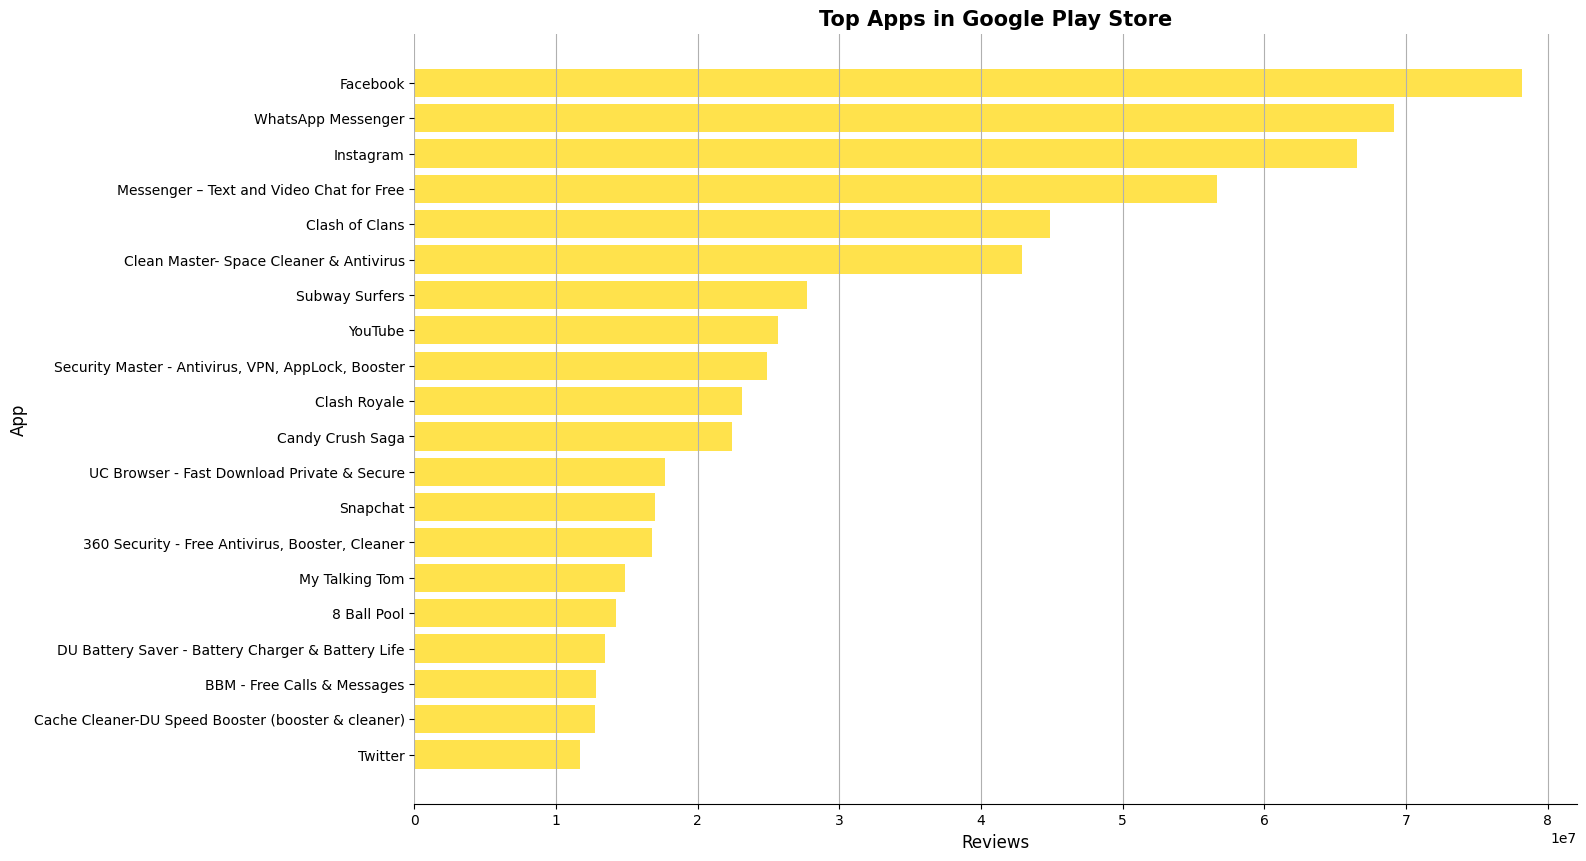

In [206]:
x = data.sort_values(by='Reviews', ascending=False).iloc[:20,:]['App']
y = data.sort_values(by='Reviews', ascending=False).iloc[:20,:]['Reviews']

fig, ax = plt.subplots(figsize=(15,10),)

ax.barh(x,y, color='gold', alpha=0.7)
ax.invert_yaxis()
# ax.set_ylim(0,20)
ax.grid(axis='x')
plt.title('Top Apps in Google Play Store', fontweight='bold', fontsize=15)
plt.ylabel('App', fontsize=12)
plt.xlabel('Reviews', fontsize=12)
sns.despine(left=True)
plt.show()

###  INSIGHT

- Facebook Has the Most Amount of Reviews

### Top Categories Bases on Installs

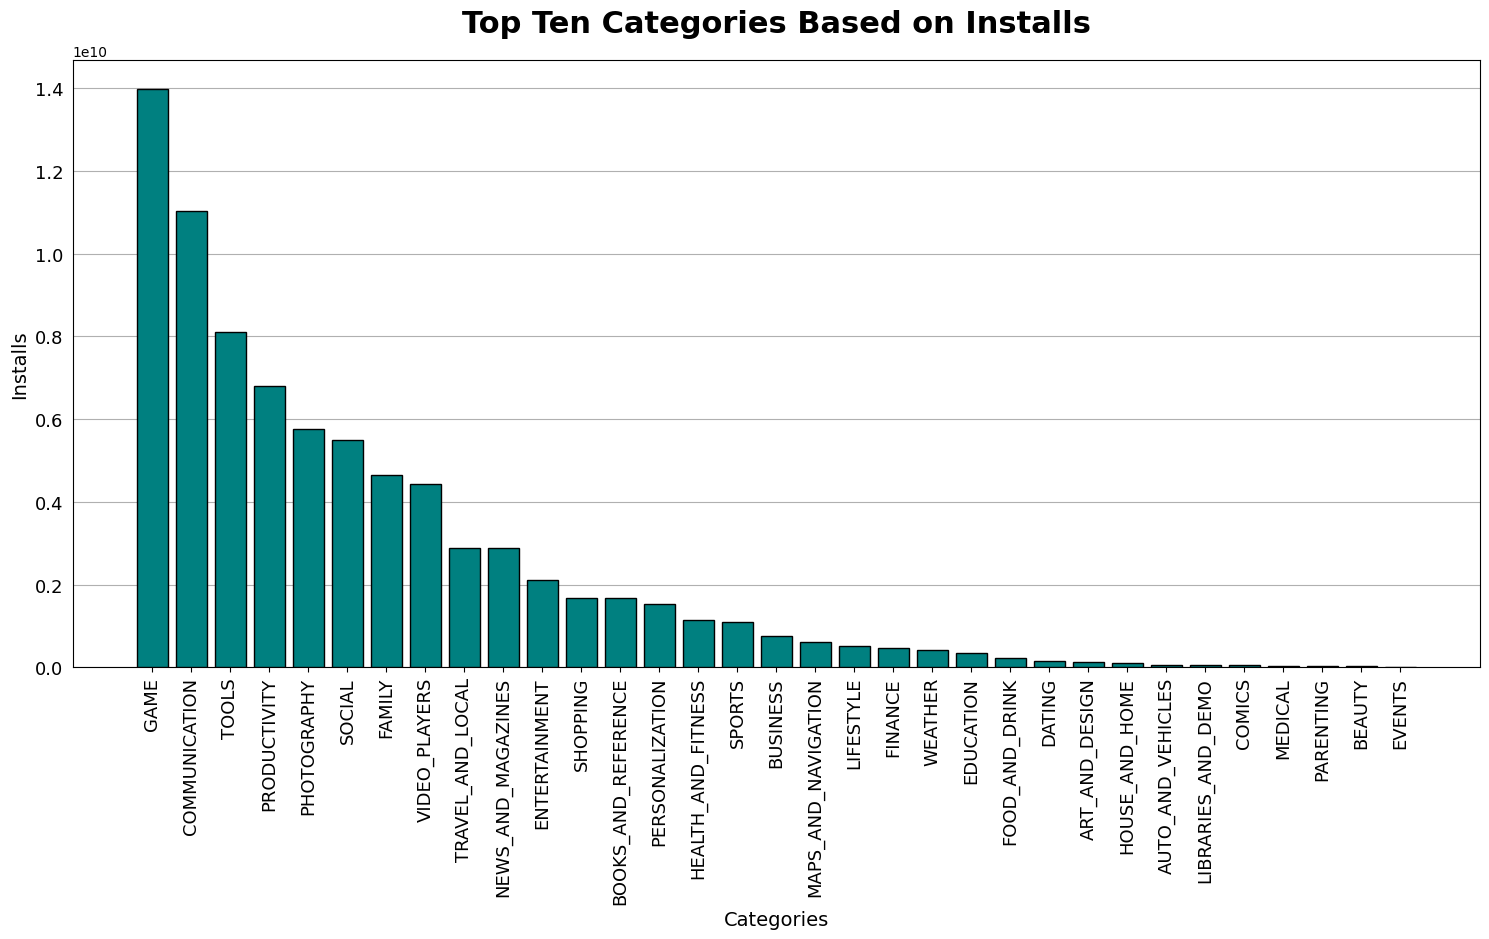

In [207]:
sorted_categories = data.loc[:,['Installs', 'Category']].groupby('Category').sum().reset_index()

merge_max = data.loc[:, ['Installs', 'Category']].groupby('Category').max().merge(sorted_categories, on='Category', suffixes=('_max', '_total'))
complete_merge = merge_max.merge(data.loc[:,['Installs', 'Category']].groupby('Category').min(), on='Category')
complete_merge = complete_merge.rename(columns={
    'Installs_max': 'Max',
    'Installs_total': 'Total',
    'Installs': 'Min'
})
complete_merge = complete_merge.sort_values(by='Total', ascending=False)

categories = complete_merge['Category'].to_list()

width = 0.8
fig, ax = plt.subplots(figsize=(15,10))
X = np.arange(len(complete_merge['Category']))

ax.bar(X, complete_merge['Total'], ec='black',zorder = 3, color='teal', width=width)

ax.set_xticks(ticks= X , labels=categories, rotation=90)

plt.tick_params(axis='both',labelsize=13,left=False,)

ax.grid(axis='y')
plt.ylabel('Installs', fontsize=14)
plt.xlabel('Categories', fontsize=14)
plt.title('Top Ten Categories Based on Installs', fontweight='bold', fontsize='22', pad=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### INSIGHTS

- Apps in the Game Category have the most installs

- Apps in the Events Category have the least Installs


### Grouping App Categories in terms of Size


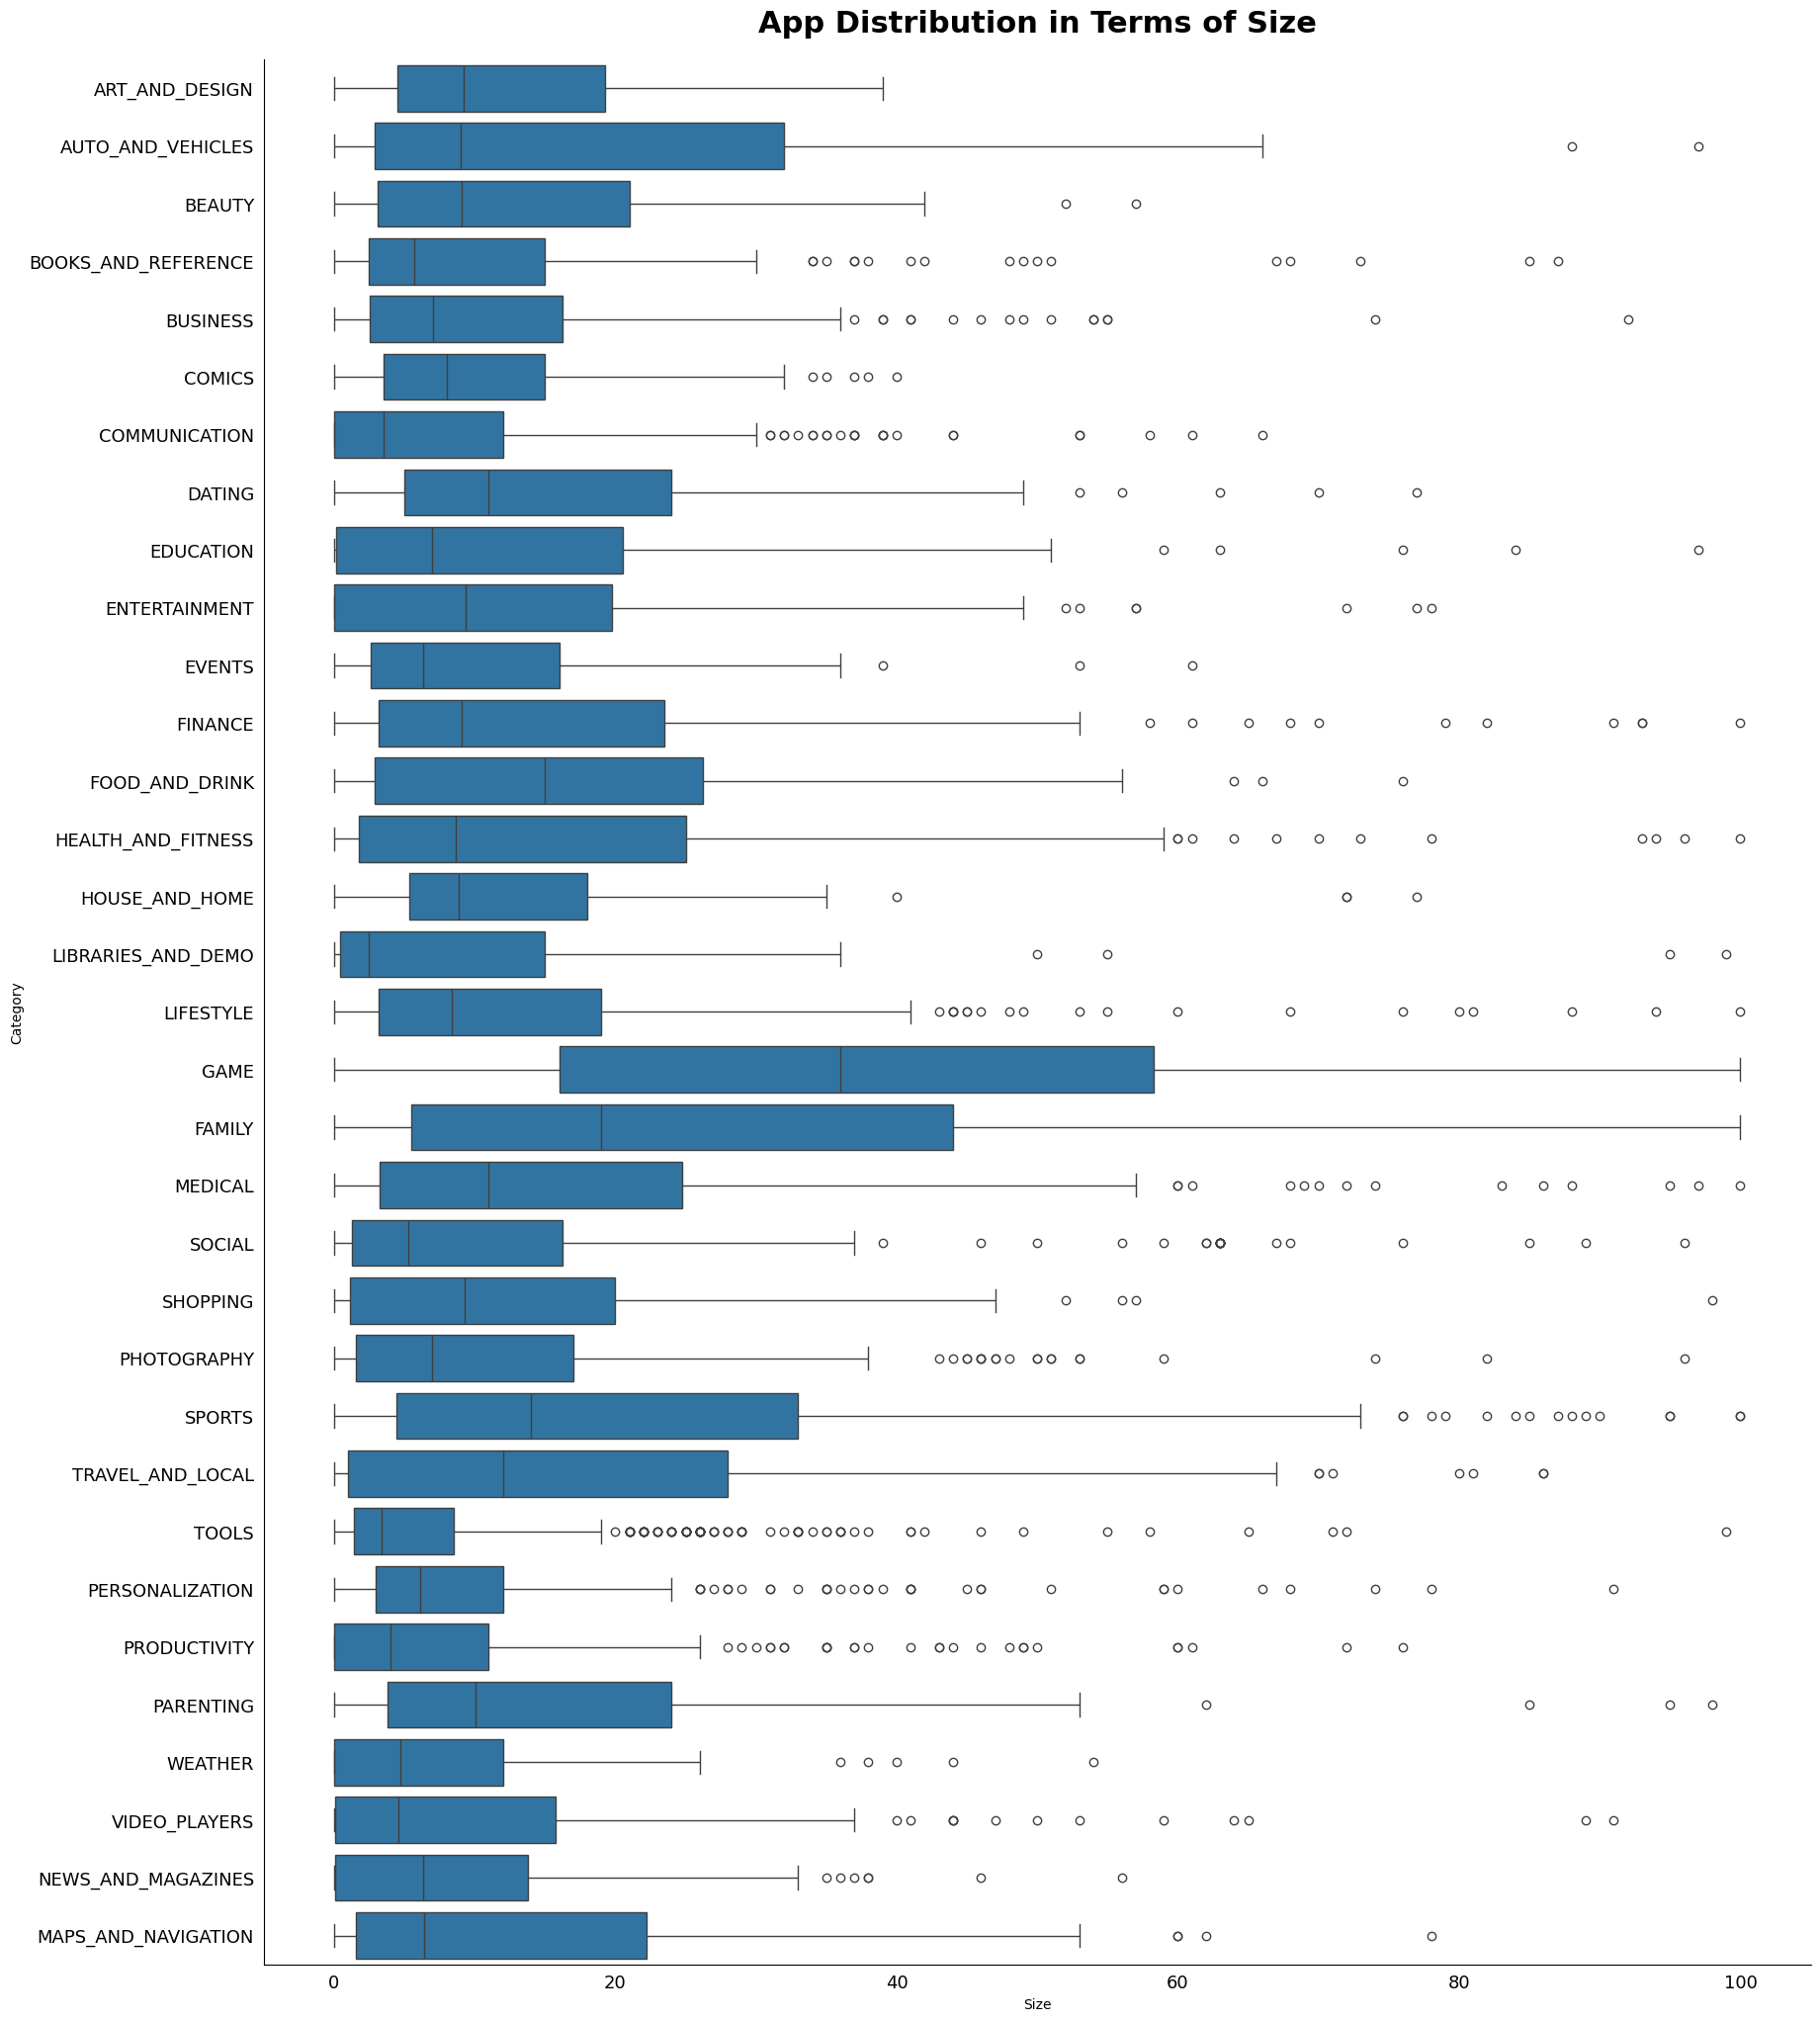

In [208]:
grouped_data = data.loc[:,['Size', 'Category']]

fig , ax = plt.subplots(figsize=(18,20))
ticks = np.arange(len(grouped_data.groupby('Category')))

sns.boxplot(y=grouped_data['Category'], x=grouped_data['Size'], ax=ax)
plt.tight_layout()
plt.tick_params(axis='both',labelsize=13,direction='out',left=False,bottom=False)

plt.title('App Distribution in Terms of Size', fontweight='bold', fontsize='22', pad=20)
sns.despine()

plt.show()


### INSIGHTS

- The Categories Art and Design, Comics, Events, House and Home, Libraries and Demo have smaller range of sizes

- Categories Game and Family have the widest range of Sizes


In [209]:
size_sort = data.sort_values(by='Size', ascending=False).head(20)

# plt.barh(size_sort['App'], size_sort['Size'])

# plt.show()
size_sort

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5865,Gangster Town: Vice District,FAMILY,4.3,65146,100.0,10000000,Free,0.00,Mature 17+,Simulation,2018-05-31,2.1,4.0 and up
5862,Miami crime simulator,GAME,4.0,254518,100.0,10000000,Free,0.00,Mature 17+,Action,2018-07-09,2.0,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,10000000,Free,0.00,Everyone,Lifestyle;Pretend Play,2018-07-16,9.0,4.0 and up
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933,100.0,5000000,Free,0.00,Everyone,Sports,2018-05-11,25.7,4.1 and up
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100.0,10000,Free,0.00,Everyone,Racing,2018-05-20,1.03,4.1 and up
2299,Navi Radiography Pro,MEDICAL,4.7,11,100.0,500,Paid,15.99,Everyone,Medical,2018-01-14,1.2.0,4.0.3 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100.0,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up
9170,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,1000000,Paid,0.99,Everyone 10+,Action,2018-08-03,2.3.24,4.1 and up
5530,The Walking Dead: Our World,GAME,4.0,22435,100.0,1000000,Free,0.00,Teen,Action,2018-08-01,1.1.0.3,5.0 and up
7404,SimCity BuildIt,FAMILY,4.5,4218587,100.0,50000000,Free,0.00,Everyone 10+,Simulation,2018-06-19,1.23.3.75024,4.0 and up


###  Apps  in terms of Content  Rating

#### Truncate outliers and have a side plot 

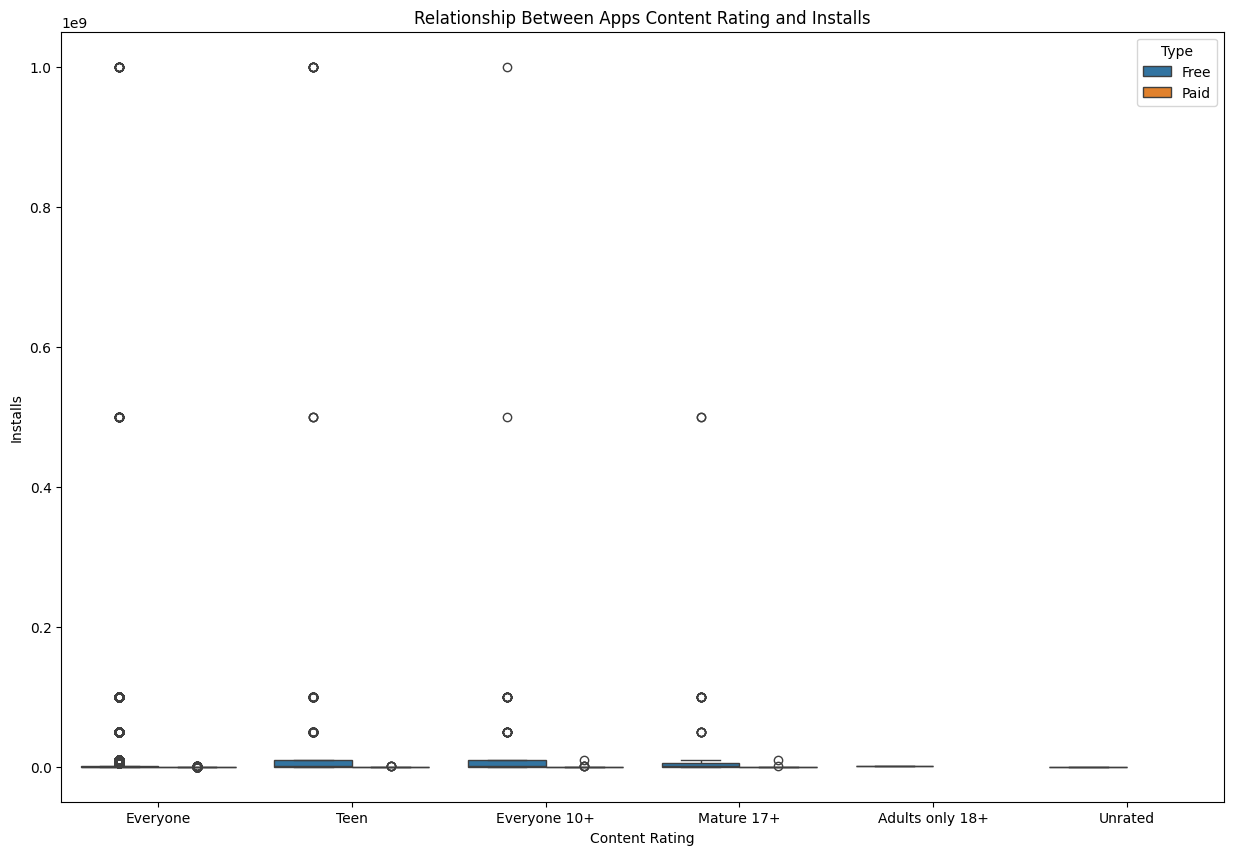

In [210]:
plt.figure(figsize=(15,10))

sns.boxplot(data=data, x='Content Rating', y='Installs', hue='Type')
plt.title('Relationship Between Apps Content Rating and Installs')
plt.show()

### Relationship Between Size and Price

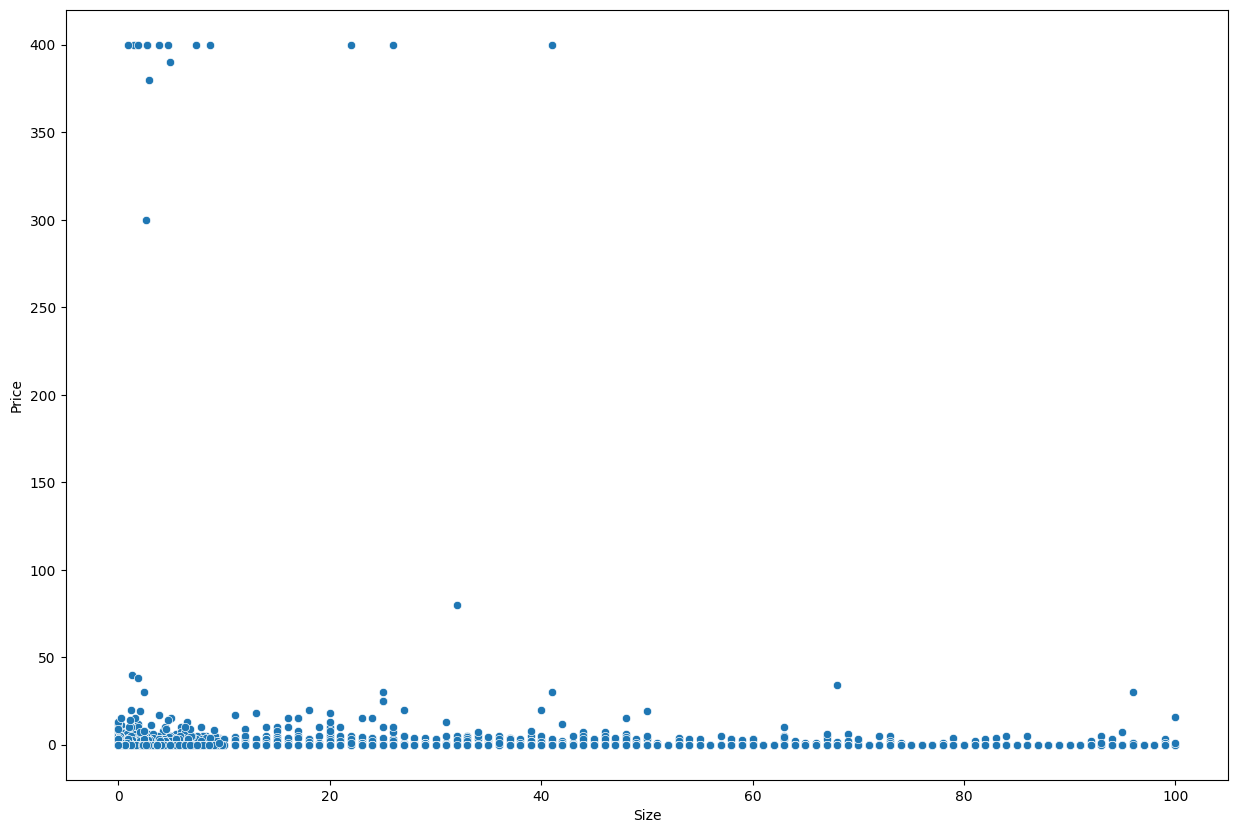

In [211]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x='Size', y='Price')

plt.show()

### Relationship between Rating and Installs

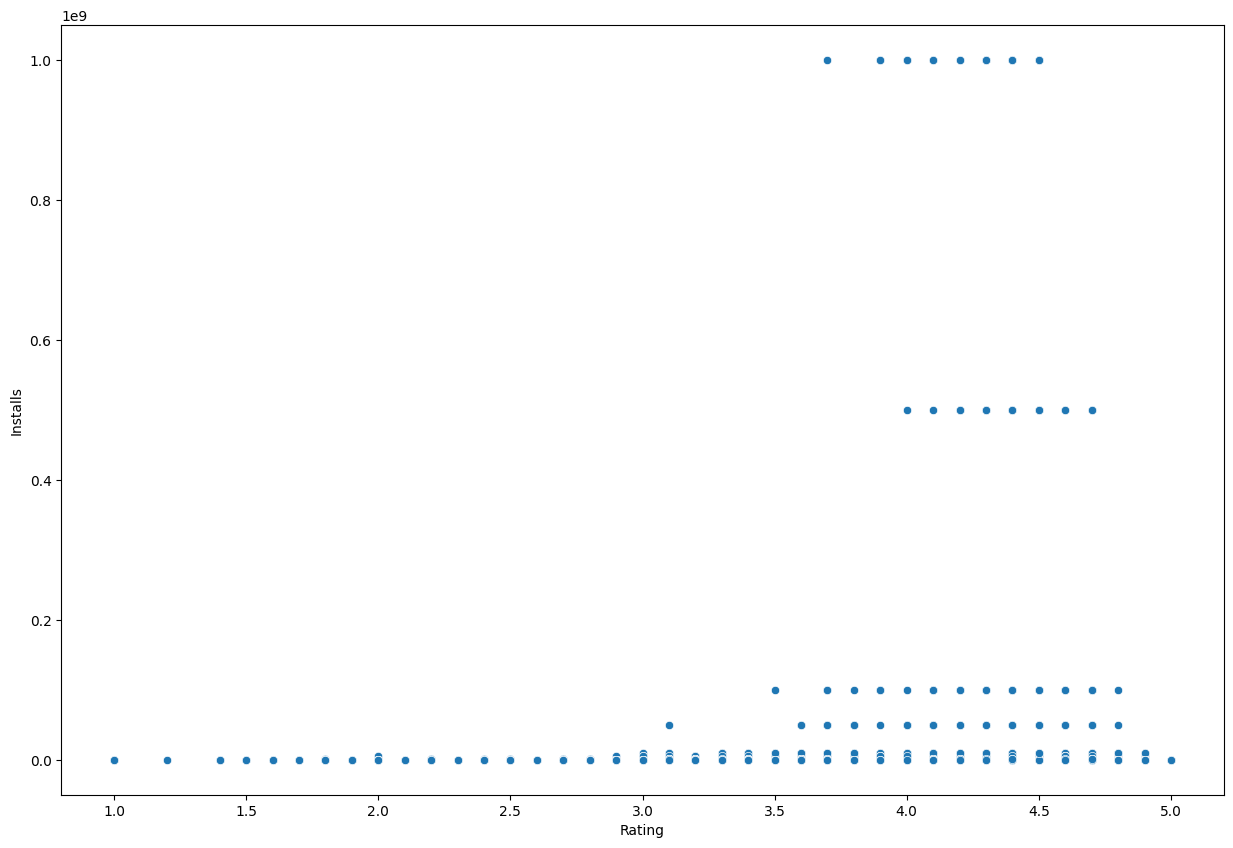

In [212]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(x=data['Rating'], y=data['Installs'])

plt.show()

### Relationship Between Type and Installs

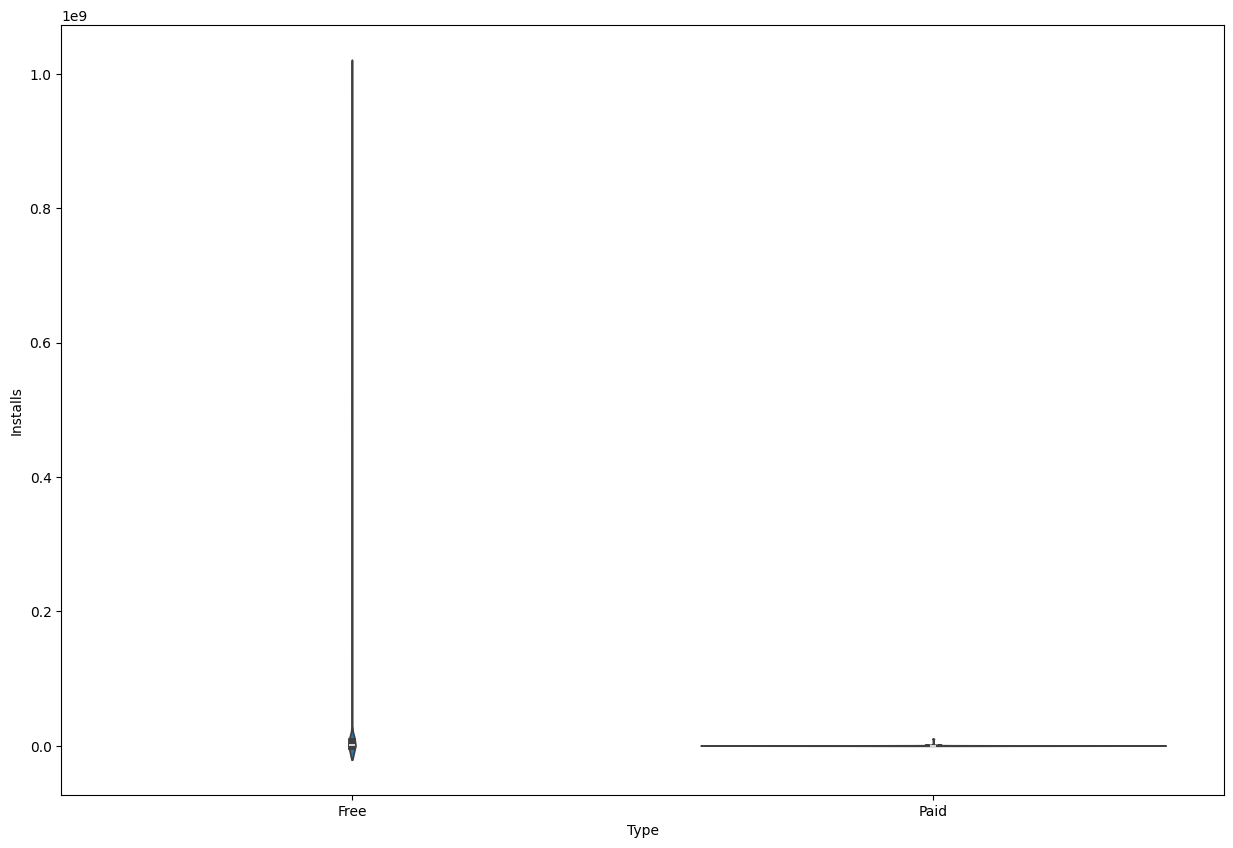

In [213]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data, x='Type', y='Installs')

plt.show()

In [214]:
type_data = data.loc[:,['Installs', 'Type']].groupby('Type').sum()

plt.figure(figsize=(15,10))
plt.bar(type)

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1500x1000 with 0 Axes>

### Relationship between Price and Installs

## Reviews DF

In [ ]:
reviews = pd.read_csv('./googleplaystore_user_reviews.csv')
reviews
with open ('reviews.pkl', 'wb') as file:
    pickle.dump(reviews, file)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### Number of Positive and Negative Reviews

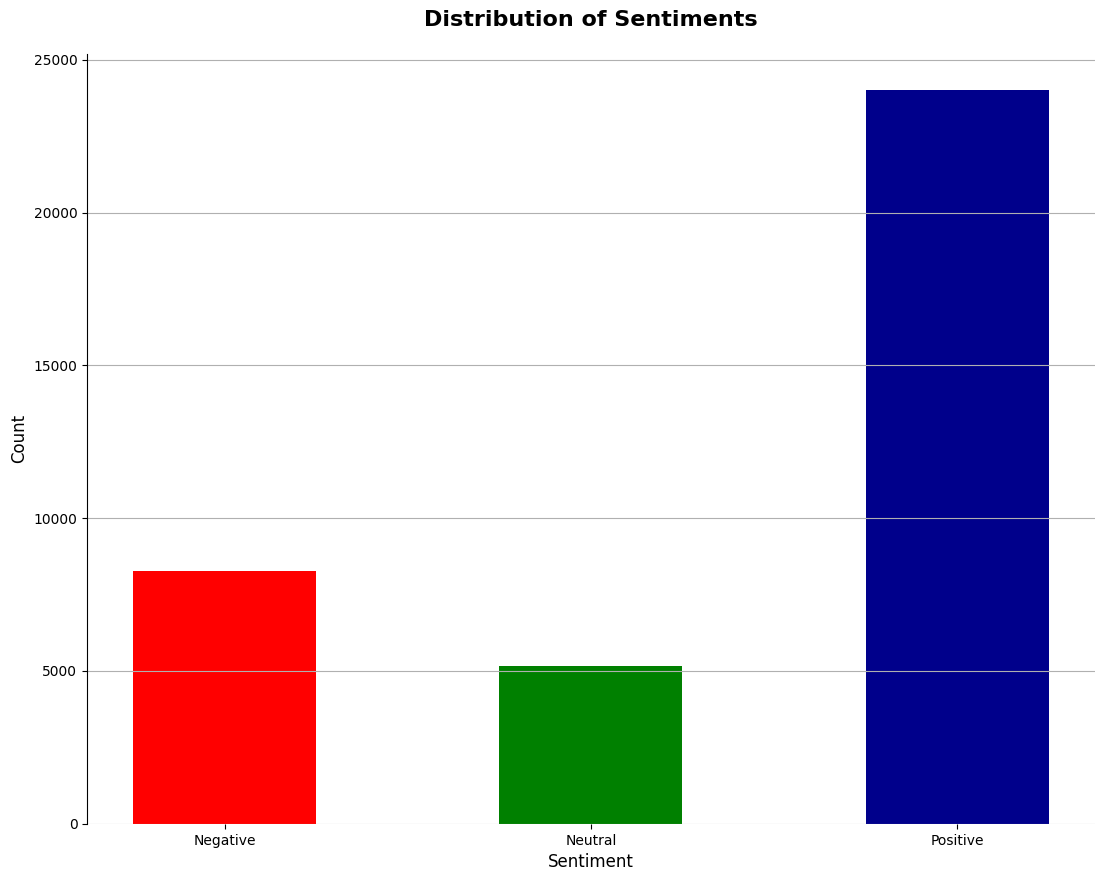

In [ ]:
plt.figure(figsize=(13,10))

sentiments = reviews.groupby('Sentiment').count().reset_index()
x = sentiments['Sentiment']
y = sentiments['App']
plt.bar(x, y, color=['red', 'green', 'darkblue'], width=0.5)

plt.grid(axis='y')
sns.despine(bottom=True, top=True)
plt.xticks()
plt.title('Distribution of Sentiments', pad=20, fontweight='bold', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [ ]:
sentiments

,Sentiment,App,Translated_Review,Sentiment_Polarity,Sentiment_Subjectivity
0,Negative,8271,8271,8271,8271
1,Neutral,5163,5158,5163,5163
2,Positive,23998,23998,23998,23998


(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

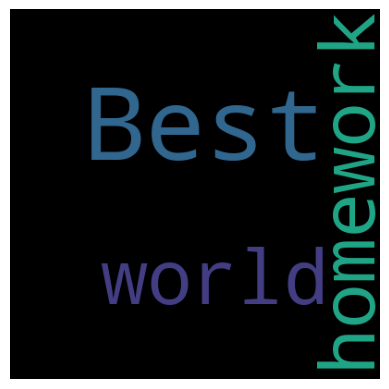

In [ ]:

homework = full_data[full_data.App == 'HomeWork'].reset_index()
homework_reviews = homework.groupby('Sentiment').count().reset_index().loc[:,'App']
homework
text = ''.join(homework[homework.Translated_Review.notna()].loc[:,'Translated_Review'].to_list())
wordcloud = WordCloud(width=400, height=400).generate(text)

plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
plt.figure(figsize=(10,10))

editted_sentiments = sentiments.loc[:,['App']]
print(editted_sentiments)
editted_sentiments.T
# editted_sentiments = editted_sentiments.T.rename(columns={
#     0:'Negative',
#     1:'Neutral',
#     2:'Positive'
# })
# editted_sentiments = editted_sentiments.reset_index().drop(columns=['index'])

# plt.pie(editted_sentiments.iloc[0].values, labels=editted_sentiments.columns,  autopct='%1.1f%%', explode=[.05,.05,.05], colors=['red', 'grey', 'green'])
# plt.show()

     App
0   8271
1   5163
2  23998


,0,1,2
App,8271,5163,23998


<Figure size 1000x1000 with 0 Axes>

### INSIGHTS 

- More than 50% of the reviews are positive

### Merge the Reviews and Apps

In [ ]:
full_data = pd.merge(data, reviews, how='inner',  on='App')
with open('full_data.pkl', 'wb') as file:
    pickle.dump(full_data, file)

In [217]:
full_data[(full_data.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
6774,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,NaN,NaN,NaN,NaN
6775,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,NaN,NaN,NaN,NaN
6776,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,NaN,NaN,NaN,NaN
6777,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,NaN,NaN,NaN,NaN
6778,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53202,BIG Launcher,PERSONALIZATION,4.3,881,5.9,10000,Paid,9.99,Everyone,Personalization,2018-06-20,2.5.9,2.1 and up,Amazing app. Thanks developers wonderful app.,Positive,0.600000,0.700000
53203,BIG Launcher,PERSONALIZATION,4.3,881,5.9,10000,Paid,9.99,Everyone,Personalization,2018-06-20,2.5.9,2.1 and up,Superb Awesome app.very easy use.,Positive,0.811111,0.944444
53204,BIG Launcher,PERSONALIZATION,4.3,881,5.9,10000,Paid,9.99,Everyone,Personalization,2018-06-20,2.5.9,2.1 and up,Love simple easy-to-use,Positive,0.250000,0.478571
53205,BIG Launcher,PERSONALIZATION,4.3,881,5.9,10000,Paid,9.99,Everyone,Personalization,2018-06-20,2.5.9,2.1 and up,Black Friday Deal Sonny Been waiting deal moth...,Positive,0.016667,0.316667


### Distribution of Positive Reviews for Most Positive Apps

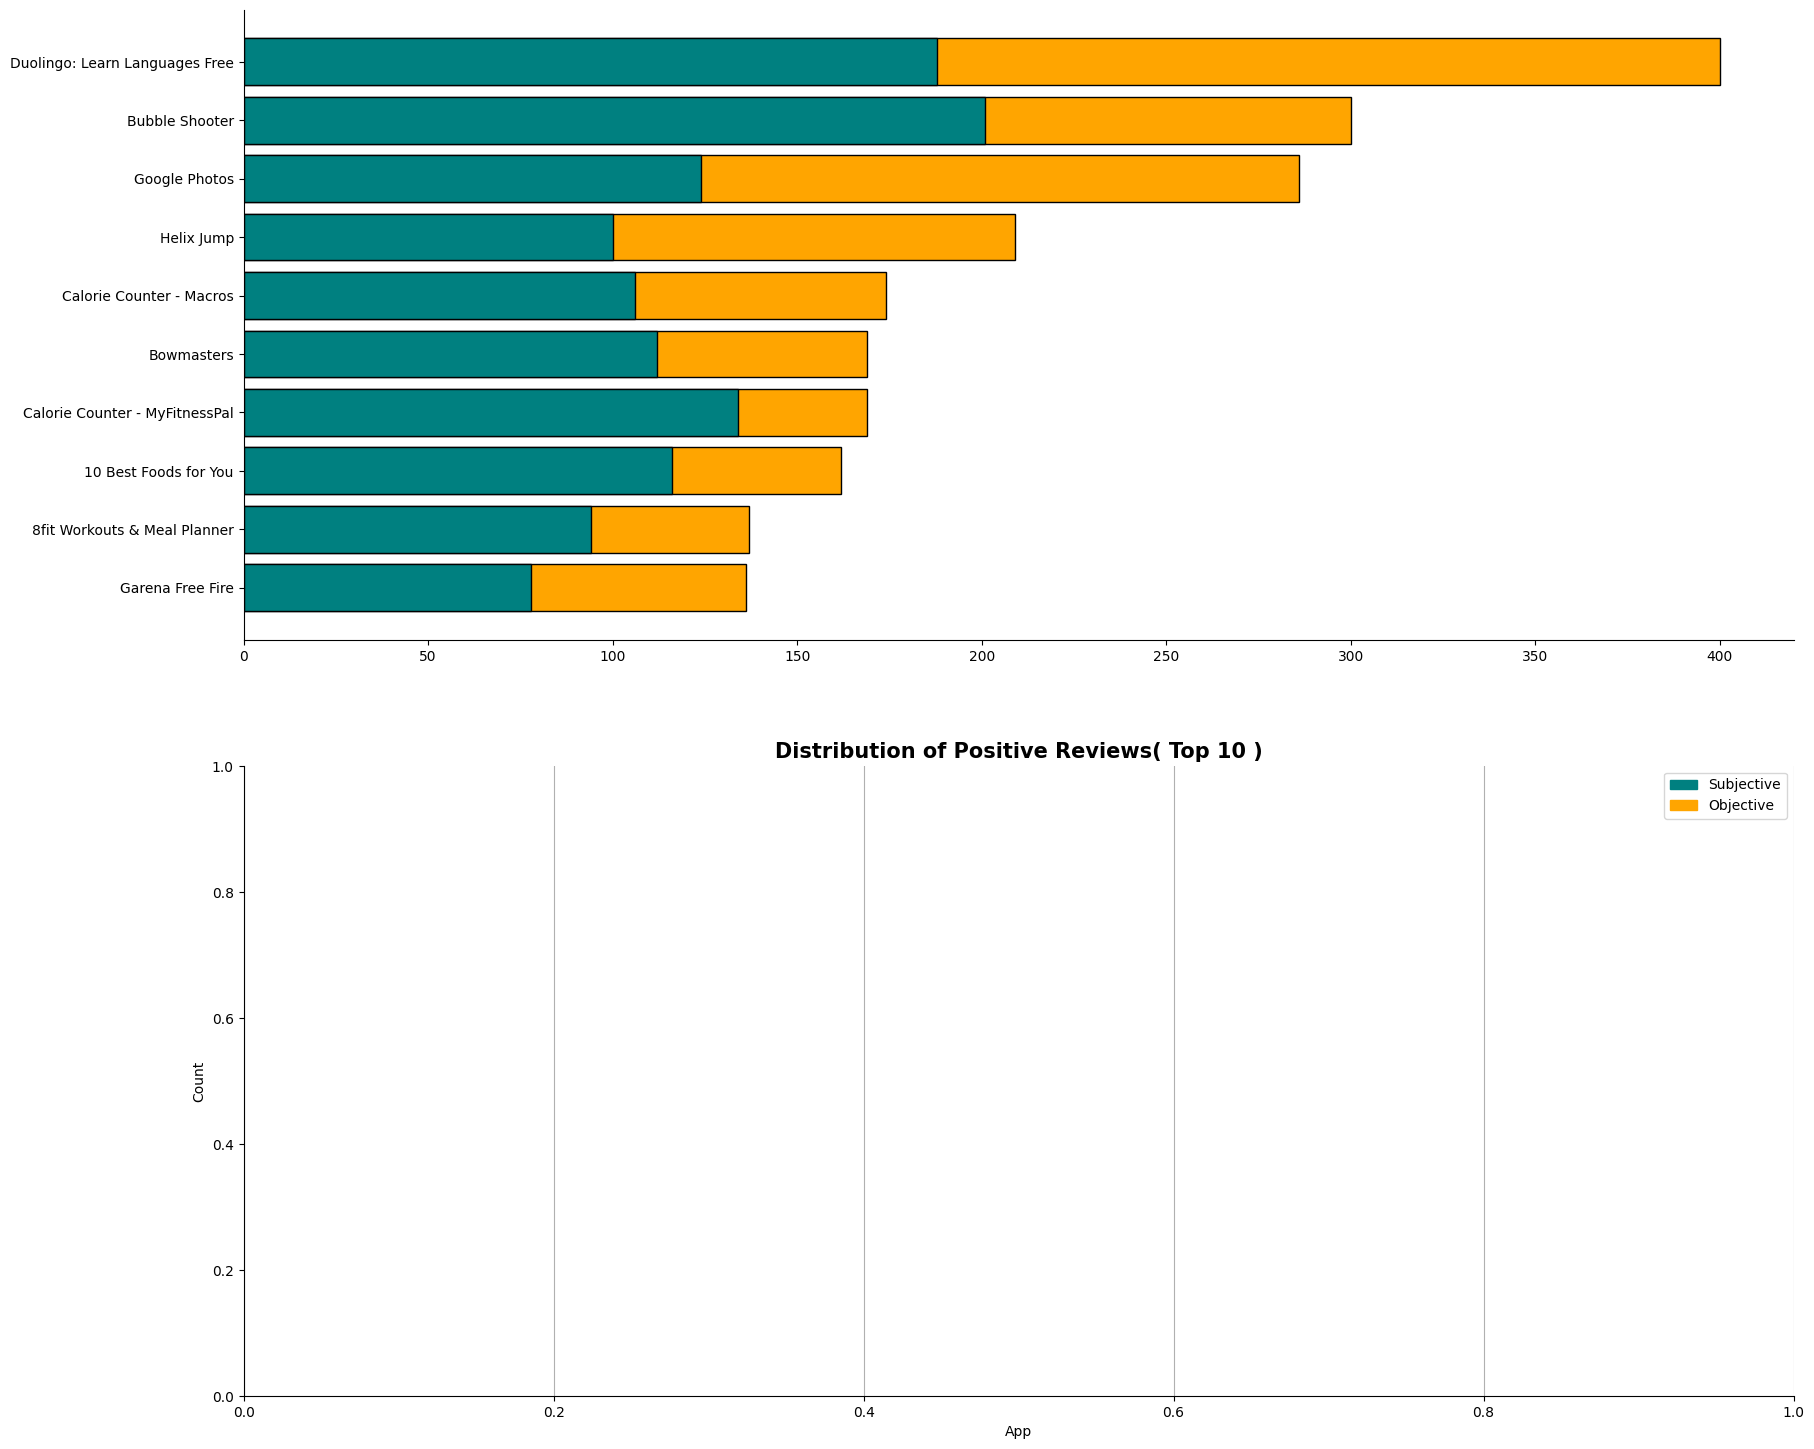

,App,Sentiment,Sentiment_Subjectivity
0,Garena Free Fire,136,78
1,8fit Workouts & Meal Planner,137,94
2,10 Best Foods for You,162,116
3,Calorie Counter - MyFitnessPal,169,134
4,Bowmasters,169,112
5,Calorie Counter - Macros,174,106
6,Helix Jump,209,100
7,Google Photos,286,124
8,Bubble Shooter,300,201
9,Duolingo: Learn Languages Free,400,188


In [ ]:
# Geting Top 10 Positive Reviews
positive_reviews = full_data[full_data.Sentiment == 'Positive'].loc[:,['App', 'Sentiment']].groupby('App').count().reset_index().sort_values(by='Sentiment').tail(10)

# Getting the subjectivity of the reviews
subjectivity = full_data[(full_data.Sentiment == "Positive") & (full_data.Sentiment_Subjectivity >= 0.5)].loc[:,['App', 'Sentiment_Subjectivity']].groupby('App').count().reset_index()

# Merging the subjectivity and the positive_reviews
positive_reviews_subjectivity = pd.merge(positive_reviews, subjectivity, on='App', how='left')

fig, ax = plt.subplots(nrows=2, figsize=(20,18))

x = positive_reviews_subjectivity['App']
y= positive_reviews_subjectivity['Sentiment']
y2 = positive_reviews_subjectivity['Sentiment_Subjectivity']
x_list = np.arange(len(x))
labels = x.to_list()
width = 0.6

ax[0].barh(x, y, ec='black', color='orange')
ax[0].barh(x, y2, ec='black', color='teal')

plt.title('Distribution of Positive Reviews( Top 10 )', fontweight='bold', fontsize=15)
plt.xlabel('App')
plt.ylabel('Count')
plt.grid(axis='x')

sns.despine()

from matplotlib.patches import Patch

legend = [Patch(color='teal', label='Subjective'),
          Patch(color='orange', label='Objective')]

plt.legend(handles=legend)
plt.show()

positive_reviews_subjectivity

SIDE BY SIDE

In [ ]:
full_data[full_data.App == 'Duolingo: Learn Languages Free'].reset_index().loc[0,'Installs']

np.int64(100000000)

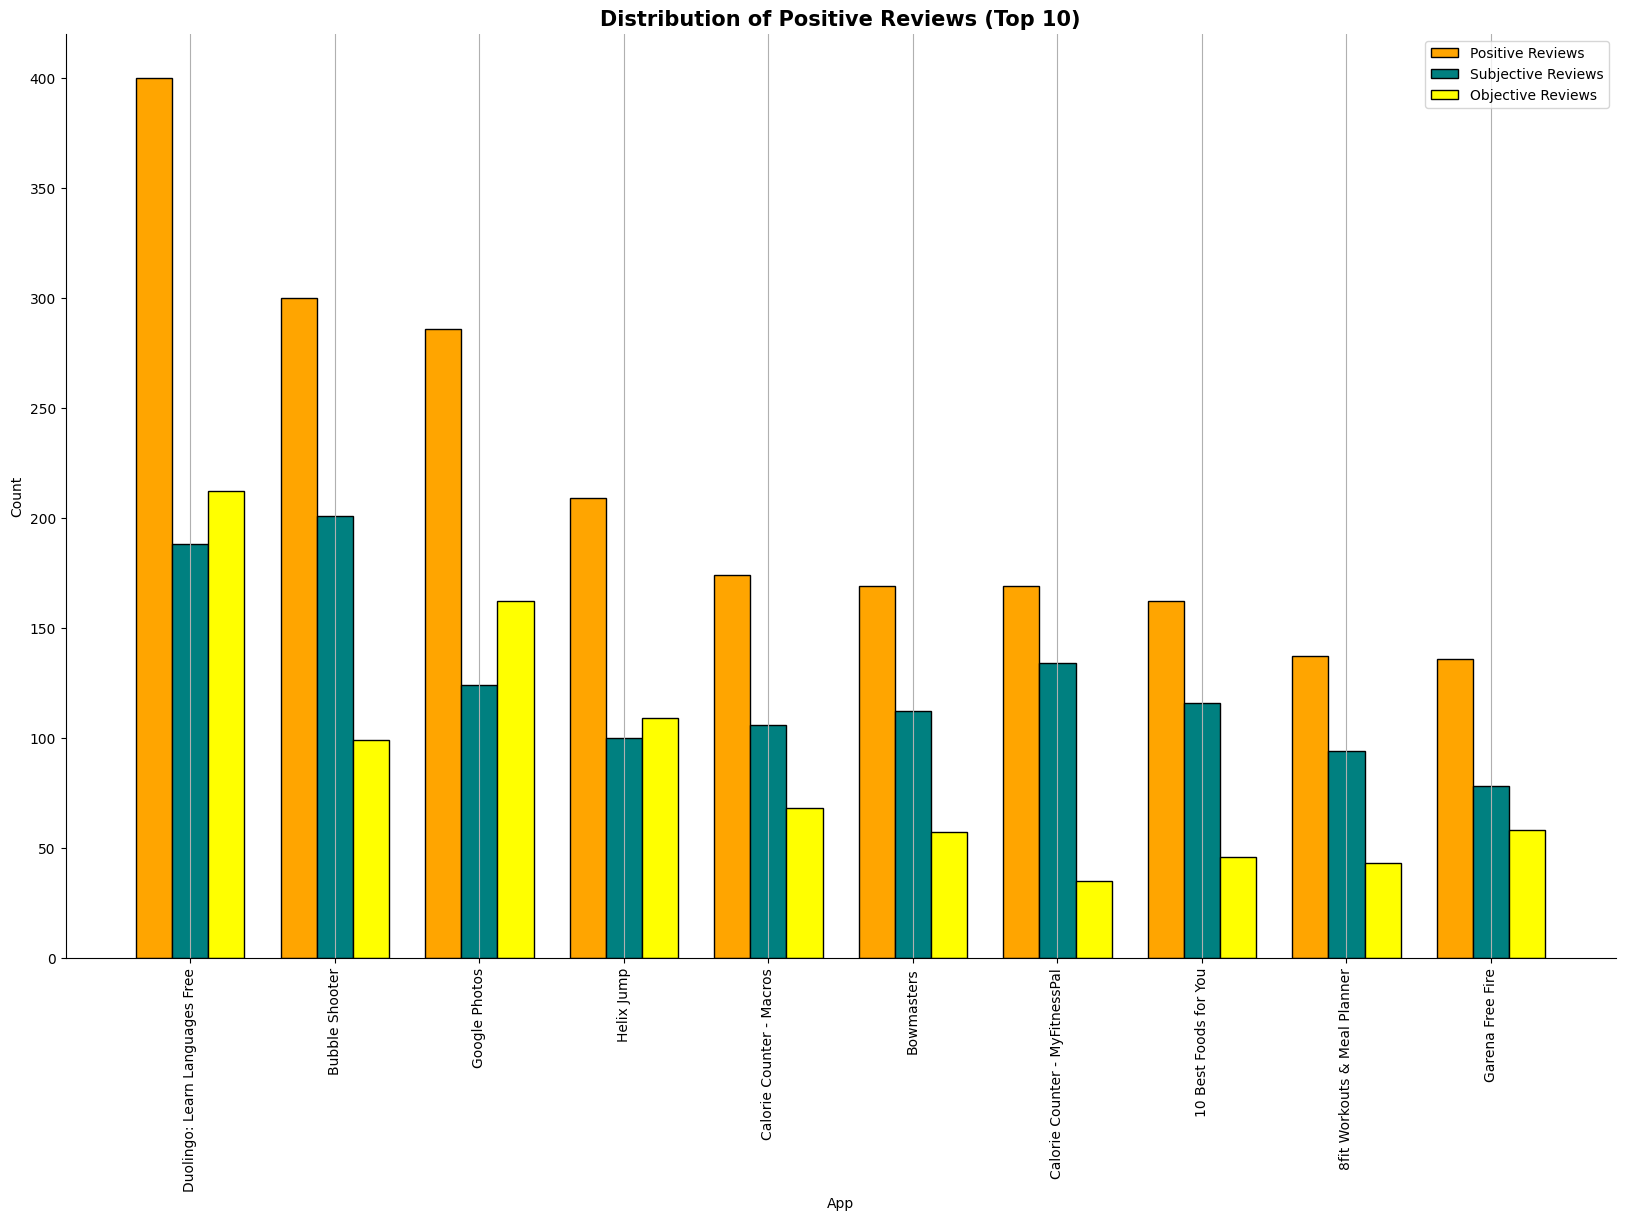

,App,Sentiment,Sentiment_Subjectivity
0,Duolingo: Learn Languages Free,400,188
1,Bubble Shooter,300,201
2,Google Photos,286,124
3,Helix Jump,209,100
4,Calorie Counter - Macros,174,106
5,Bowmasters,169,112
6,Calorie Counter - MyFitnessPal,169,134
7,10 Best Foods for You,162,116
8,8fit Workouts & Meal Planner,137,94
9,Garena Free Fire,136,78


In [ ]:
# Geting Top 10 Positive Reviews
positive_reviews = full_data[full_data.Sentiment == 'Positive'].loc[:,['App', 'Sentiment']].groupby('App').count().reset_index().sort_values(by='Sentiment', ascending=False).head(10)

# Getting the subjectivity of the reviews
subjectivity = full_data[(full_data.Sentiment == "Positive") & (full_data.Sentiment_Subjectivity >= 0.5)].loc[:,['App', 'Sentiment_Subjectivity']].groupby('App').count().reset_index()

# Merging the subjectivity and the positive_reviews
positive_reviews_subjectivity = pd.merge(positive_reviews, subjectivity, on='App', how='left')

fig, ax = plt.subplots(figsize=(20,12))

x = positive_reviews_subjectivity['App']
y= positive_reviews_subjectivity['Sentiment']
y2 = positive_reviews_subjectivity['Sentiment_Subjectivity']
x_list = np.arange(len(x))
labels = x.to_list()
width = 0.25

ax.bar(x_list - width, y, width=width, color='orange', edgecolor='black', label='Positive Reviews')
ax.bar(x_list, y2, width=width, color='teal', edgecolor='black', label='Subjective Reviews')
ax.bar(x_list + width, y - y2, width=width, color='yellow', edgecolor='black', label='Objective Reviews')

plt.title('Distribution of Positive Reviews (Top 10)', fontweight='bold', fontsize=15)
plt.xlabel('App')
plt.ylabel('Count')
plt.grid(axis='x')


ax.set_xticks(ticks=x_list)
ax.set_xticklabels(labels, rotation=90)

sns.despine()

plt.legend()
plt.show()
positive_reviews_subjectivity

### INSIGHTS

- Duolingo has the most positive reviews with an almost equal split between subjectivity and objectivity

### TRY ADDING NEGATIVE REVIEWS TO THE PLOT ABOVE WITH SAME SUBJECTIVITY PARTITION

In [ ]:
# Geting Top 10 Positive Reviews
positive_reviews = full_data[full_data.Sentiment == 'Positive'].loc[:,['App', 'Sentiment']].groupby('App').count().reset_index().sort_values(by='Sentiment').tail(10)

# Getting the subjectivity of the reviews
subjectivity = full_data[(full_data.Sentiment == "Positive") & (full_data.Sentiment_Subjectivity >= 0.5)].loc[:,['App', 'Sentiment_Subjectivity']].groupby('App').count().reset_index()

# Merging the subjectivity and the positive_reviews
positive_reviews_subjectivity = pd.merge(positive_reviews, subjectivity, on='App', how='left')

fig, ax = plt.subplots(figsize=(15,10))

x = positive_reviews_subjectivity['App']
y= positive_reviews_subjectivity['Sentiment']
y2 = positive_reviews_subjectivity['Sentiment_Subjectivity']
x_list = np.arange(len(x))
labels = x.to_list()
width = 0.6

ax.barh(x, y, ec='black', color='orange')
ax.barh(x, y2, ec='black', color='teal')

plt.title('Distribution of Positive Reviews( Top 10 )')
plt.xlabel('App')
plt.ylabel('Count')
plt.grid(axis='x')

sns.despine()

from matplotlib.patches import Patch

legend = [Patch(color='teal', label='Subjective'),
          Patch(color='orange', label='Objective')]

plt.legend(handles=legend)
plt.show()

positive_reviews_subjectivity

### Apps With Most Negative Reviews

### SIDE BY SIDE PLOTS

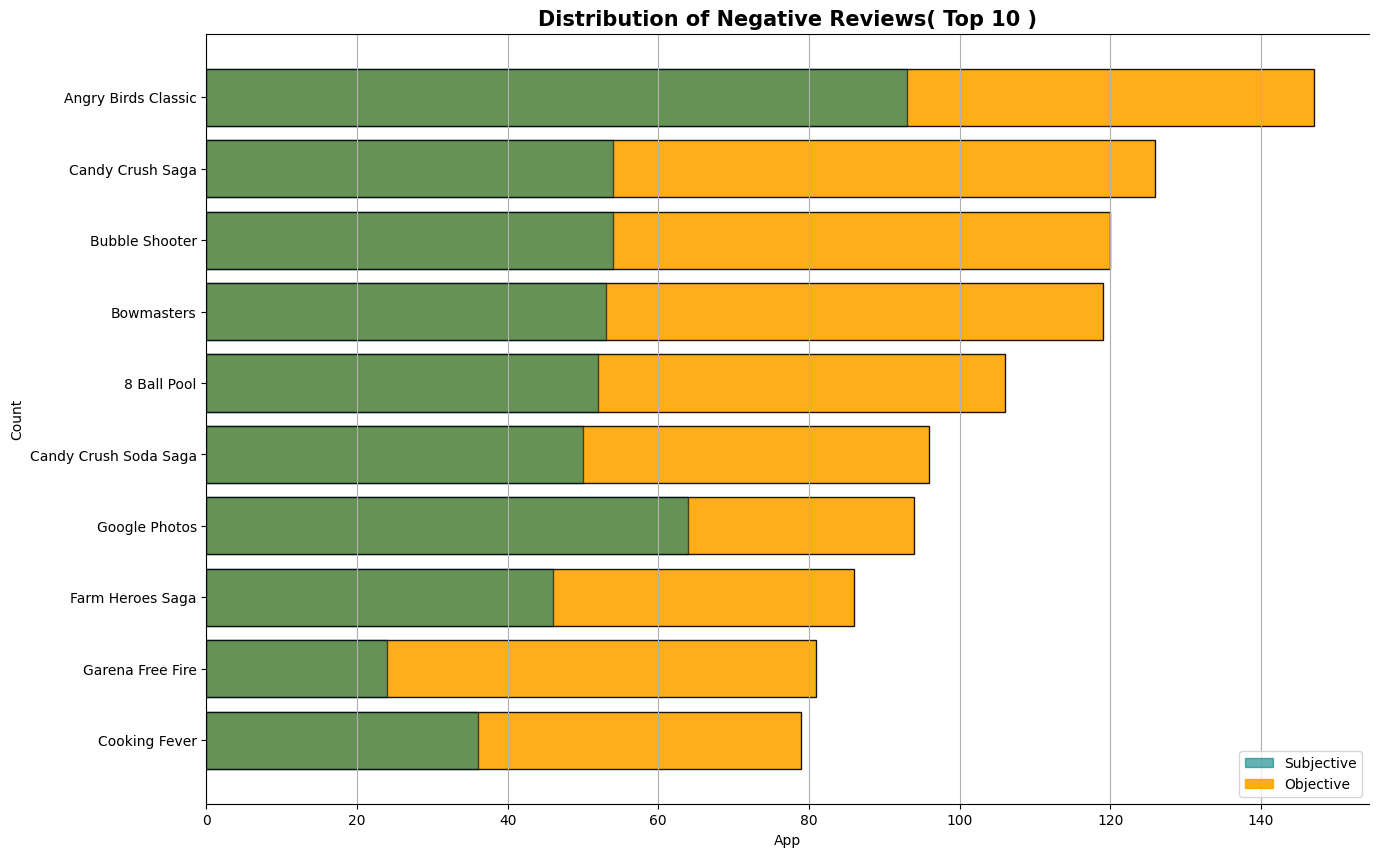

,App,Sentiment,Sentiment_Subjectivity
0,Cooking Fever,79,36
1,Garena Free Fire,81,24
2,Farm Heroes Saga,86,46
3,Google Photos,94,64
4,Candy Crush Soda Saga,96,50
5,8 Ball Pool,106,52
6,Bowmasters,119,53
7,Bubble Shooter,120,54
8,Candy Crush Saga,126,54
9,Angry Birds Classic,147,93


In [ ]:
# Geting Top 10 Negative Reviews
negative_reviews = full_data[full_data.Sentiment == 'Negative'].loc[:,['App', 'Sentiment']].groupby('App').count().reset_index().sort_values(by='Sentiment').tail(10)

# Getting the subjectivity of the reviews
subjectivity = full_data[(full_data.Sentiment == "Negative") & (full_data.Sentiment_Subjectivity >= 0.5)].loc[:,['App', 'Sentiment_Subjectivity']].groupby('App').count().reset_index()

# Merging the subjectivity and the negative_reviews
negative_reviews_subjectivity = pd.merge(negative_reviews, subjectivity, on='App', how='left')

fig, ax = plt.subplots(figsize=(15,10))

x = negative_reviews_subjectivity['App']
y= negative_reviews_subjectivity['Sentiment']
y2 = negative_reviews_subjectivity['Sentiment_Subjectivity']
x_list = np.arange(len(x))
labels = x.to_list()
width = 0.6

ax.barh(x, y, ec='black', color='orange', alpha=0.9)
ax.barh(x, y2, ec='black', color='teal',alpha=0.6)

plt.title('Distribution of Negative Reviews( Top 10 )', fontweight='bold', fontsize=15)
plt.xlabel('App')
plt.ylabel('Count')
plt.grid(axis='x')

sns.despine(top=False)

from matplotlib.patches import Patch

legend = [Patch(color='teal', alpha=0.6, label='Subjective'),
          Patch(color='orange', alpha=0.9, label='Objective')]

plt.legend(handles=legend)
plt.show()

negative_reviews_subjectivity

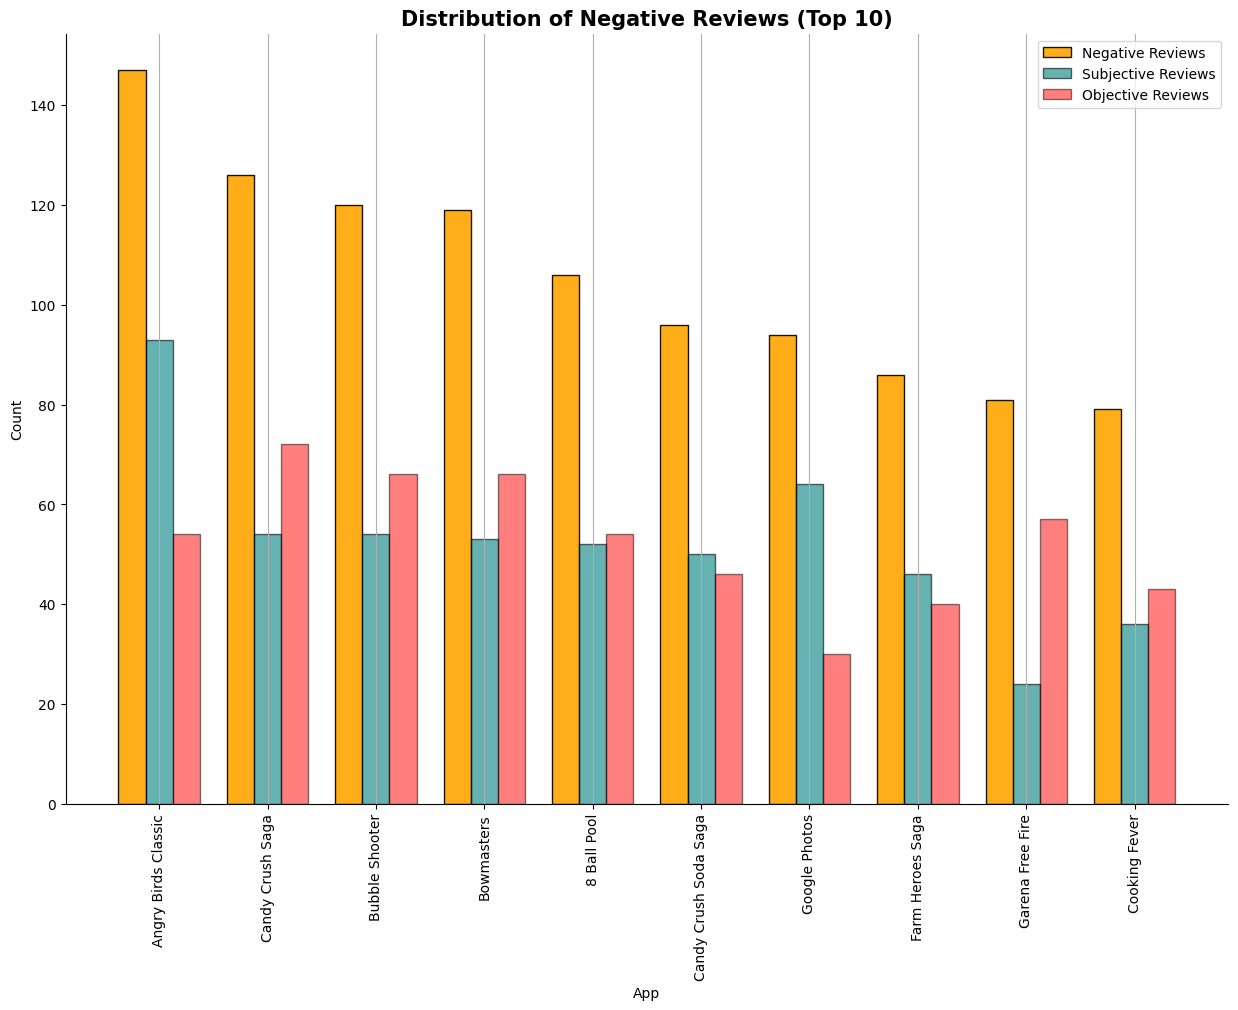

In [ ]:
# Geting Top 10 Negative Reviews
negative_reviews = full_data[full_data.Sentiment == 'Negative'].loc[:,['App', 'Sentiment']].groupby('App').count().reset_index().sort_values(by='Sentiment', ascending=False).head(10)

# Getting the subjectivity of the reviews
subjectivity = full_data[(full_data.Sentiment == "Negative") & (full_data.Sentiment_Subjectivity >= 0.5)].loc[:,['App', 'Sentiment_Subjectivity']].groupby('App').count().reset_index()

# Merging the subjectivity and the negative_reviews
negative_reviews_subjectivity = pd.merge(negative_reviews, subjectivity, on='App', how='left')

fig, ax = plt.subplots(figsize=(15,10))

x = negative_reviews_subjectivity['App']
y= negative_reviews_subjectivity['Sentiment']
y2 = negative_reviews_subjectivity['Sentiment_Subjectivity']
x_list = np.arange(len(x))
labels = x.to_list()
width = 0.25


ax.bar(x_list - width, y, ec='black', width=width, color='orange', alpha=0.9, label='Negative Reviews')
ax.bar(x_list, y2, ec='black', width=width, color='teal',alpha=0.6, label='Subjective Reviews')
ax.bar(x_list + width, y-y2,  ec='black', width=width, color='red', alpha=0.5, label='Objective Reviews')

plt.title('Distribution of Negative Reviews (Top 10)', fontweight='bold', fontsize=15)
plt.xlabel('App')
plt.ylabel('Count')
plt.grid(axis='x')

ax.set_xticks(ticks=x_list)
ax.set_xticklabels(labels, rotation=90)
sns.despine()

plt.legend()

plt.show()


### INSIGHTS


- Angry Birds Classic has the most Negative reviews with more than 50% of them being subjective

- 

In [ ]:
angry_birds = full_data[full_data.App == 'Angry Birds Classic'].reset_index()
text = ','.join(angry_birds[angry_birds.Translated_Review.notna()].loc[:,'Translated_Review'].to_list())
text

'Way many ads. I remember Angry Birds first came fun. Now nothing constant ads forced videos timers proceed. Makes game virtually unplayable, I\'ve uninstalled it. A shame, too. But I\'m going held hostage ads videos. Bad enough YouTube it. And Rovio YouTube.,Angry Birds used game could tap play heart\'s content. Now gone fee-to-pay (sic) -- read reviews see well received. Not well understatement. I\'d say more, gain 50 stars read new paragraph. Meanwhile, watch unskippable half-minute-long ads.,Good job Rovio, good job joining pay play band wagon.... I mind ads add cliche pay win features like coins gems? Why?.... Disappointing... But I doubt company would ever change game well, money pays bills right....i doubt company guys even look feedback reviews otherwise would never strayed darkside free play.,The "Mighty League" part unplayable. It constantly freezes. After close everything start freeze again. Rovio known years care less. Don\'t waste time,The Miller lite beer ads really need 

### Relationship Sentiment Polarity and Sentiments

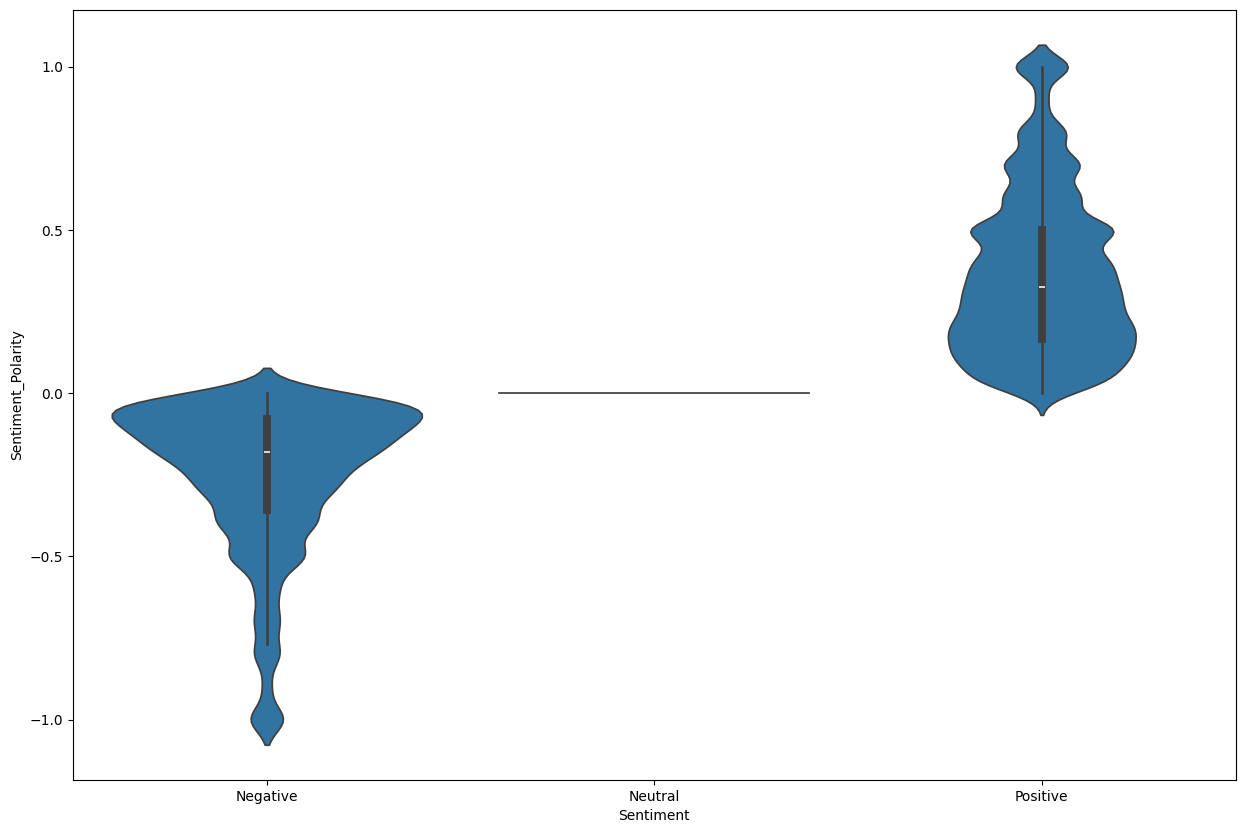

In [ ]:
plt.figure(figsize=(15,10))

x =  full_data['Sentiment']
y = full_data['Sentiment_Subjectivity']

# sns.boxplot(data=full_data, x='Sentiment', y='Sentiment_Subjectivity')
sns.violinplot(data=full_data, x='Sentiment', y='Sentiment_Polarity')

plt.show()
# full_data[(full_data.Sentiment == 'Negative') & (full_data.Sentiment_Subjectivity <= 0.5)].loc[:,['Sentiment', 'Sentiment_Subjectivity']]

### INSIGHTS

- Majority of the reviews are close to neutrality

### Distribution of the Subjective Sentiments

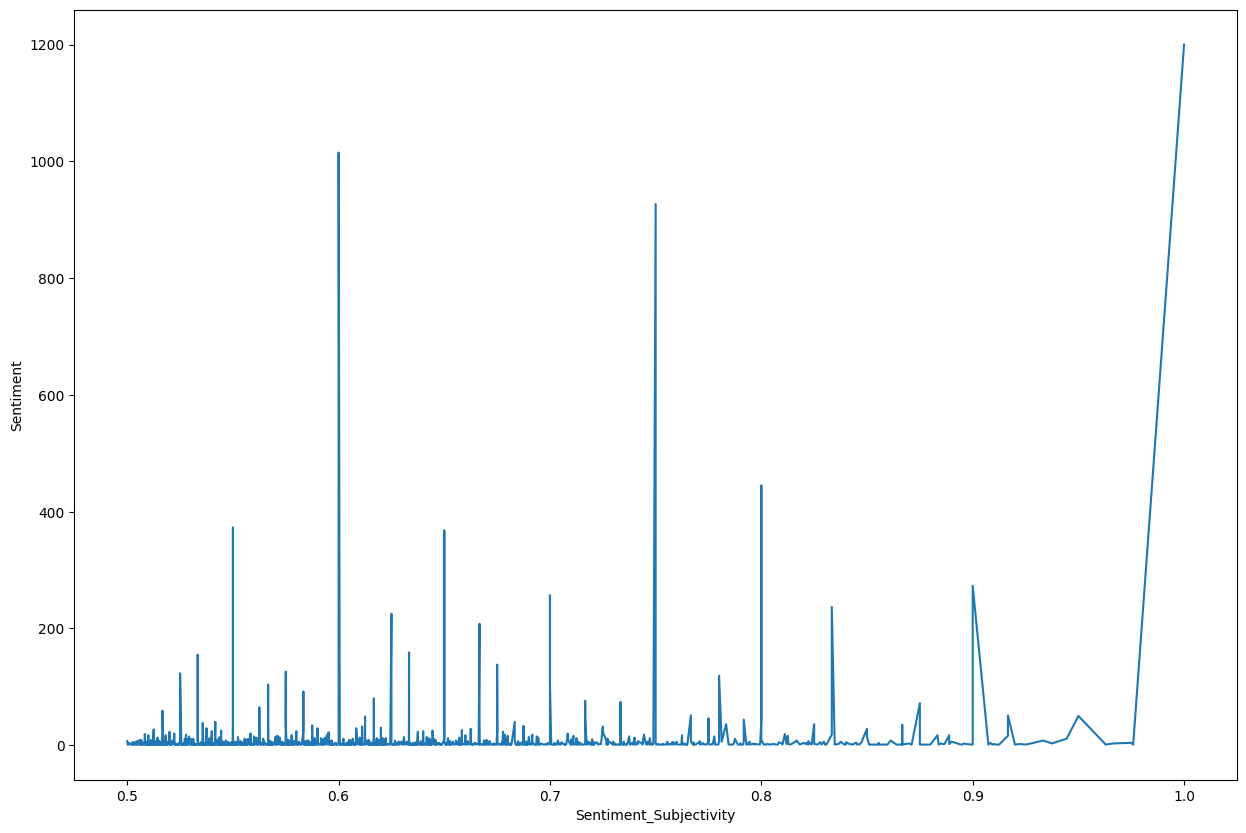

In [ ]:
subjective_positive_sentiments = full_data[(full_data.Sentiment == 'Positive') & (full_data.Sentiment_Subjectivity > 0.5)].loc[:,['Sentiment', 'Sentiment_Subjectivity']].groupby('Sentiment_Subjectivity').count().reset_index()
plt.figure(figsize=(15,10))
sns.lineplot(data=subjective_positive_sentiments,  x='Sentiment_Subjectivity', y='Sentiment')
plt.show()

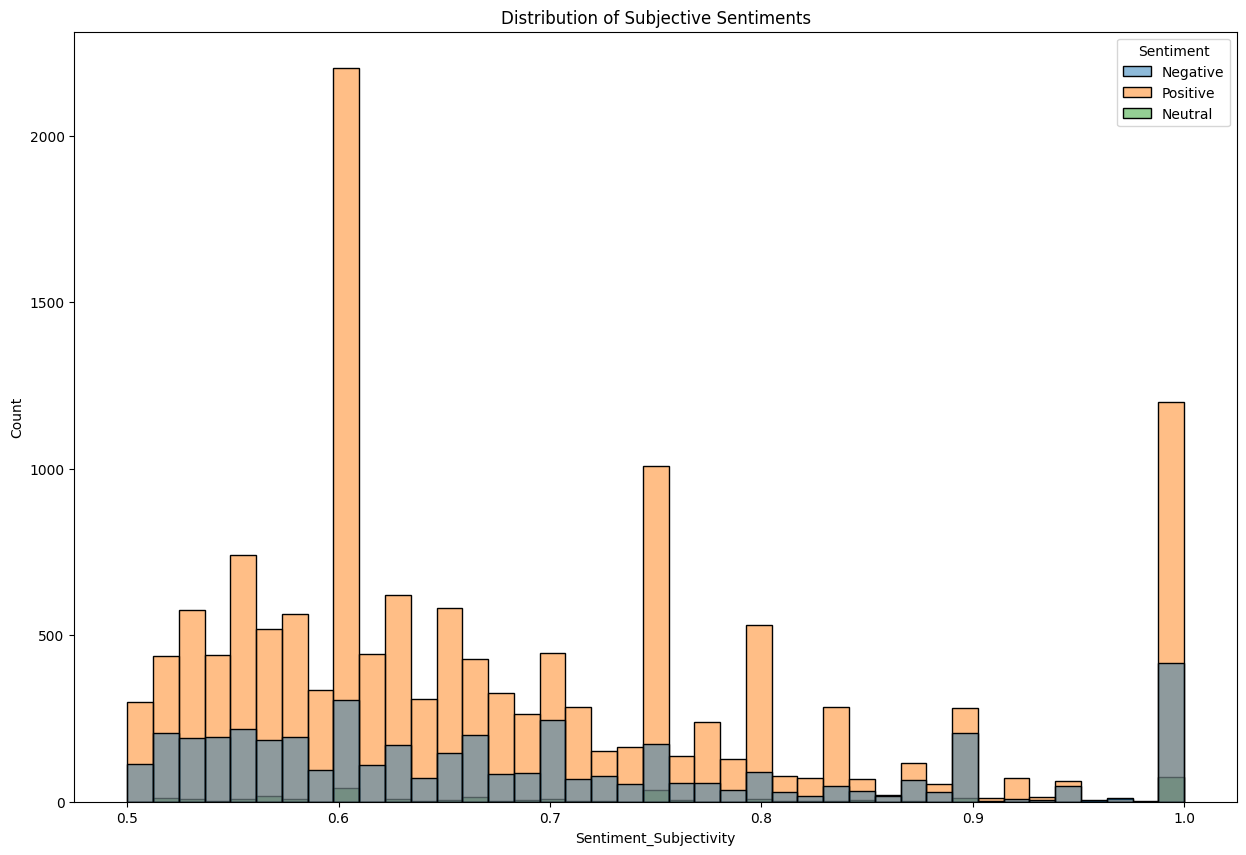

In [ ]:
subjective_sentiments = full_data[(full_data.Sentiment_Subjectivity > 0.5)].loc[:,['Sentiment', 'Sentiment_Subjectivity']]
plt.figure(figsize=(15,10))
sns.histplot(data=subjective_sentiments, x='Sentiment_Subjectivity', hue='Sentiment')

plt.title('Distribution of Subjective Sentiments')
plt.show()


### INSIGHTS

- Majority of the Positive Reviews Lie between subjectivity level 0.5 to 0.8

- Subjectivity level of 0.6 yields the most positive reviews

### Distribution of Objective Reviews

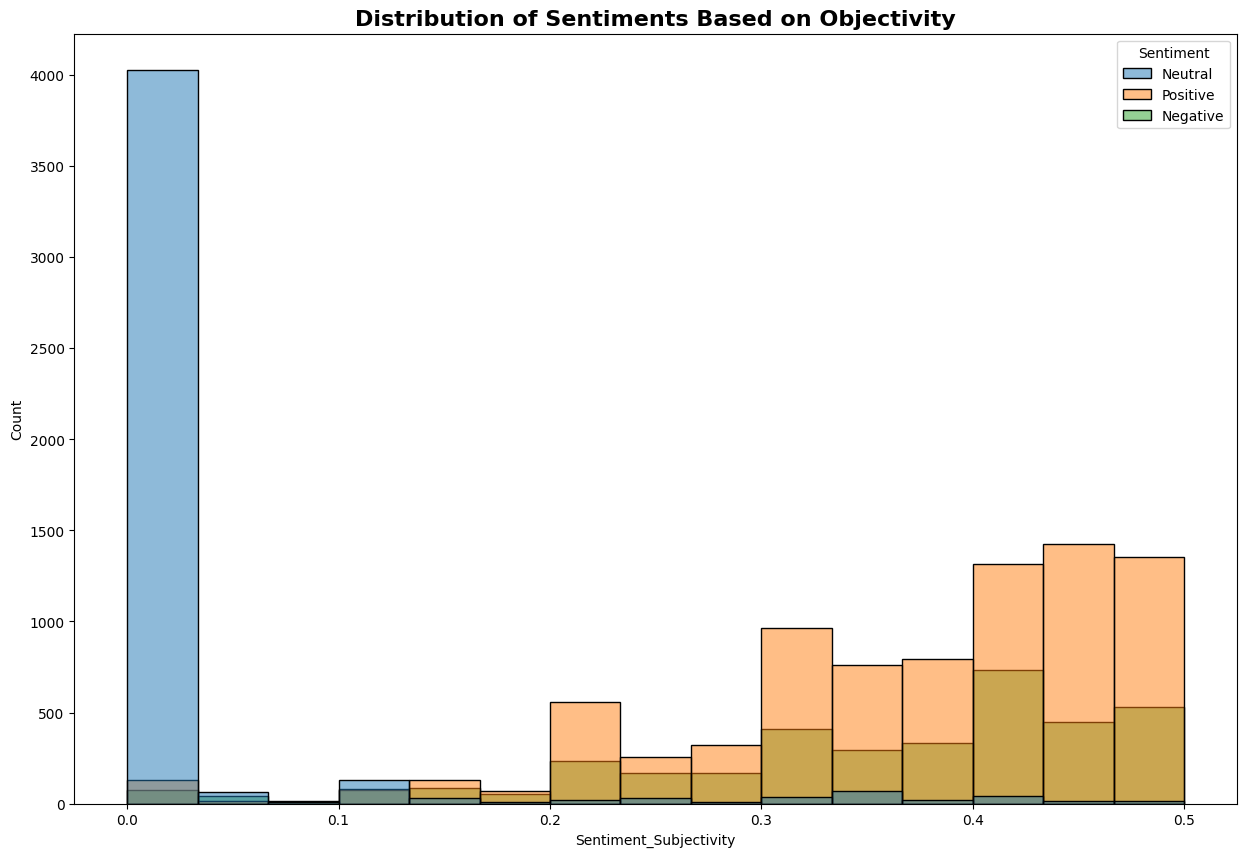

In [ ]:
objective_sentiments = full_data[(full_data.Sentiment_Subjectivity < 0.5)].loc[:,['Sentiment', 'Sentiment_Subjectivity']]
plt.figure(figsize=(15,10))
sns.histplot(data=objective_sentiments,  x='Sentiment_Subjectivity', hue='Sentiment')

plt.title('Distribution of Sentiments Based on Objectivity', fontweight='bold', fontsize=16)
plt.show()

### INSIGHTS

- Majority of the Neutral Reviews are Highly objective

- Neutrality Reduces With a reduction in objectivity

- Inconsistent Increase in Positive Reviews with reduction in objectivity



### Comparisons between Most Positively Reviewed Apps and their Ratings

Using the highly rated apps for reference

In [ ]:
positive_apps_and_ratings

,App,Sentiment,Sentiment_Subjectivity,Rating
0,Garena Free Fire,136,78,4.5
1,8fit Workouts & Meal Planner,137,94,4.6
2,10 Best Foods for You,162,116,4.0
3,Calorie Counter - MyFitnessPal,169,134,4.6
4,Bowmasters,169,112,4.7
5,Calorie Counter - Macros,174,106,4.0
6,Helix Jump,209,100,4.2
7,Google Photos,286,124,4.5
8,Bubble Shooter,300,201,4.5
9,Duolingo: Learn Languages Free,400,188,4.7


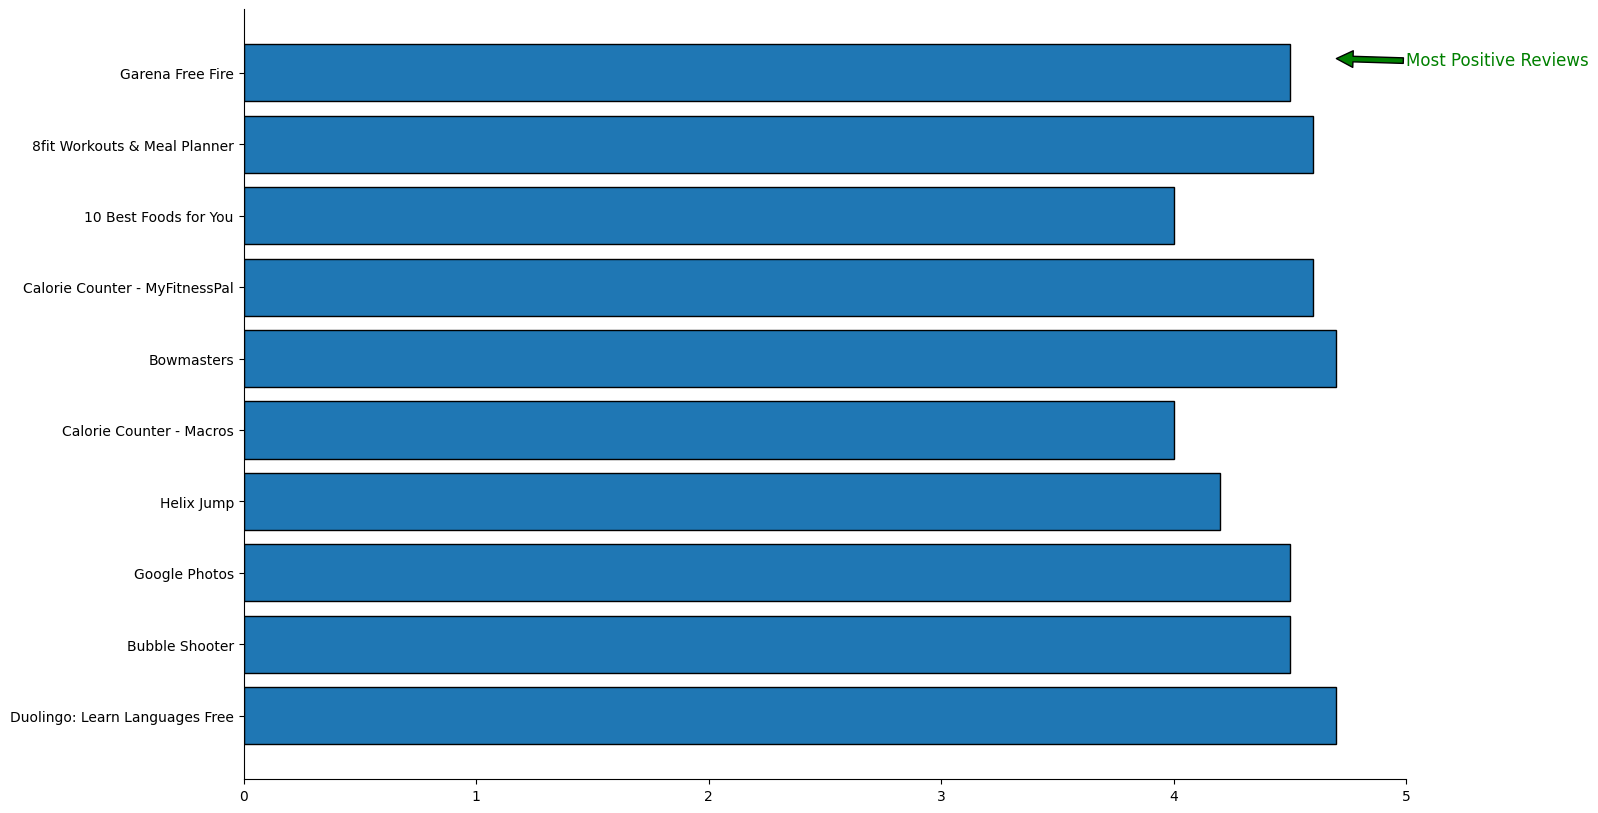

In [ ]:
max_rating = full_data.groupby('App').agg({'Rating': 'max'}).sort_values(by='Rating')
positive_reviews_subjectivity
positive_apps_and_ratings = pd.merge(positive_reviews_subjectivity, max_rating, on='App', how='left')
positive_apps_and_ratings

fig, ax = plt.subplots(figsize=(15,10))

x = positive_apps_and_ratings['App']
y = positive_apps_and_ratings['Rating']

labels = positive_apps_and_ratings['App'].to_list()

plt.barh(x,y, ec='black')

ax.set_xlim(xmin=0,xmax=5)
# ax.annotate('Most Positive Reviews', (20,20), (10,20), arrowprops=dict(facecolor='green'))

ax.annotate('Most Positive Reviews', xy=(4.7, 9.2), xytext=(5, 9.1),
            arrowprops=dict(facecolor='green', shrink=1.55),
            fontsize=12, color='green')

sns.despine()
# ax.set_yticklabels(labels=labels )

plt.show()

### Word That Appeared Most in The reviews

### Positive Reviews

In [ ]:
full_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63631,Fun Kid Racing - Motocross,FAMILY,4.1,59768,0.0,10000000,Free,0.0,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up,Great,Positive,0.800,0.750000
63632,Fun Kid Racing - Motocross,FAMILY,4.1,59768,0.0,10000000,Free,0.0,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up,NaN,NaN,NaN,NaN
63633,Fun Kid Racing - Motocross,FAMILY,4.1,59768,0.0,10000000,Free,0.0,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up,It's good,Positive,0.700,0.600000
63634,Fun Kid Racing - Motocross,FAMILY,4.1,59768,0.0,10000000,Free,0.0,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up,I like motorcycle,Neutral,0.000,0.000000


In [ ]:
pd.options.display.max_rows = 100

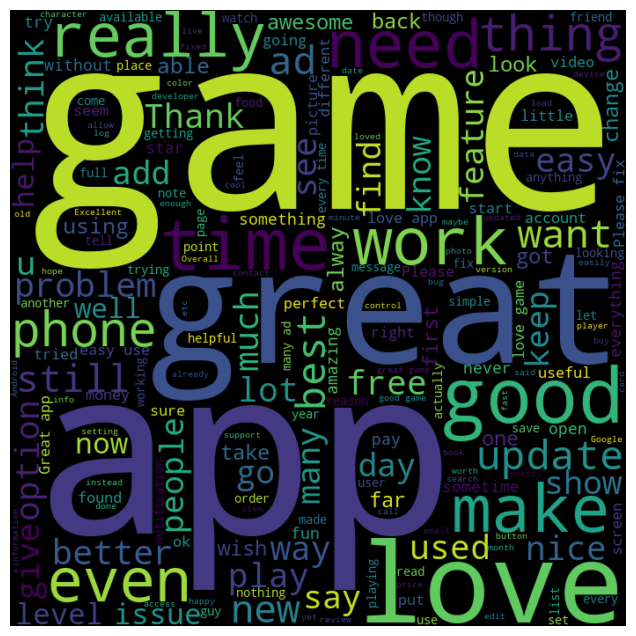

In [ ]:
text = ''.join(full_data[full_data.Sentiment == "Positive"].loc[:,'Translated_Review'])

plt.figure(figsize=(15,8))
wordcloud = WordCloud(width=700, height=700, background_color='black').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()